<a href="https://colab.research.google.com/github/alessandronascimento/pyLiBELa/blob/main/Colabs/dockrmsd_sb2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#usando o Dock RMSD encontrado em https://zhanggroup.org/DockRMSD/

!rm -rf Dock* src/*
!rmdir src
!wget https://zhanggroup.org/DockRMSD/DockRMSD.c
!wget https://zhanggroup.org/DockRMSD/DockRMSD.h
!gcc DockRMSD.c -o DockRMSD -lm -O3
!mkdir src
!mv DockRMSD.* src/

#ajeitar

rmdir: failed to remove 'src': No such file or directory
--2023-10-26 22:28:10--  https://zhanggroup.org/DockRMSD/DockRMSD.c
Resolving zhanggroup.org (zhanggroup.org)... 141.213.137.249
Connecting to zhanggroup.org (zhanggroup.org)|141.213.137.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24206 (24K) [text/plain]
Saving to: ‘DockRMSD.c’

DockRMSD.c          100%[===================>]  23.64K  --.-KB/s    in 0.02s   

2023-10-26 22:28:10 (1.14 MB/s) - ‘DockRMSD.c’ saved [24206/24206]

--2023-10-26 22:28:10--  https://zhanggroup.org/DockRMSD/DockRMSD.h
Resolving zhanggroup.org (zhanggroup.org)... 141.213.137.249
Connecting to zhanggroup.org (zhanggroup.org)|141.213.137.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24072 (24K) [text/plain]
Saving to: ‘DockRMSD.h’

DockRMSD.h          100%[===================>]  23.51K  --.-KB/s    in 0.02s   

2023-10-26 22:28:10 (964 KB/s) - ‘DockRMSD.h’ saved [24072/24072]



In [2]:
#@title Getting SB2021 data {display-mode: "form"}

%%capture
from google.colab import drive
drive.mount('/content/drive/')
sb_folder = '/content/drive/MyDrive/pyLiBELa/SB/' #@param {type:"string"}

%cd $sb_folder
targets=[]
targets_file = open('list', 'r');
for line in targets_file:
  targets.append(line.strip())
targets_file.close()

targets = targets#[:-2] #os últimos 2 são list e list.txt, só quero os pdb

In [42]:
import os
import numpy as np

energy_optimizer = 'mma_third'

#index_array = np.array(df.index)
target_cut = targets[:]

k=0

log_final = ''
data_folder = '/content/drive/MyDrive/pyLiBELa/data'


log_final_filename = 'dirty_log_'+energy_optimizer+'.txt'

%cd ~
%cd $data_folder
log_final= open(log_final_filename,'w')

k=0
for target in target_cut:
  print(k)
  k+=1
  folder = sb_folder+target

  %cd $folder
  subfolder = "self_docking_"+energy_optimizer

  %cd $subfolder
  log_final_line = target+'\t'

  if 'McLiBELa.log' in os.listdir():

    log_file = open('McLiBELa.log')

    log_lines = log_file.readlines()
    if len(log_lines) > 2:
      log_final_line += log_lines[-1][4:-1]+'\t'
    else:
      log_final_line +='\n'


  else:
    log_final_line +='\n'


  if 'log.txt' in os.listdir():
    log_file = open('log.txt')
    log_final_line += log_file.readlines()[-1]


 # print(log_line)
  log_final.write(log_final_line)


log_final.close()


/root
/content/drive/MyDrive/pyLiBELa/data
0
/content/drive/MyDrive/pyLiBELa/SB/121P
/content/drive/MyDrive/pyLiBELa/SB/121P/self_docking_mma_third
1
/content/drive/MyDrive/pyLiBELa/SB/181L
/content/drive/MyDrive/pyLiBELa/SB/181L/self_docking_mma_third
2
/content/drive/MyDrive/pyLiBELa/SB/182L
/content/drive/MyDrive/pyLiBELa/SB/182L/self_docking_mma_third
3
/content/drive/MyDrive/pyLiBELa/SB/183L
/content/drive/MyDrive/pyLiBELa/SB/183L/self_docking_mma_third
4
/content/drive/MyDrive/pyLiBELa/SB/184L
/content/drive/MyDrive/pyLiBELa/SB/184L/self_docking_mma_third
5
/content/drive/MyDrive/pyLiBELa/SB/185L
/content/drive/MyDrive/pyLiBELa/SB/185L/self_docking_mma_third
6
/content/drive/MyDrive/pyLiBELa/SB/186L
/content/drive/MyDrive/pyLiBELa/SB/186L/self_docking_mma_third
7
/content/drive/MyDrive/pyLiBELa/SB/187L
/content/drive/MyDrive/pyLiBELa/SB/187L/self_docking_mma_third
8
/content/drive/MyDrive/pyLiBELa/SB/188L
/content/drive/MyDrive/pyLiBELa/SB/188L/self_docking_mma_third
9
/content/d

In [3]:
import os
import numpy as np

energy_optimizer = 'stogo_second' #colocar formulário

#index_array = np.array(df.index)
target_cut = targets[:]

rmsd_list = np.zeros(len(target_cut))

k=0

for target in target_cut:
  print(k, target)

  folder = sb_folder+target

  %cd $folder
  subfolder = "self_docking_"+energy_optimizer
  ! mkdir -p data
  %cd $subfolder

  if "McLiBELa_dock.mol2.gz" in os.listdir():

    #!rm -rf McLiBELa.mol2 ligref.mol2

    #!cp lig.mol2.gz ligref.mol2.gz
    #!gunzip -f ligref.mol2.gz


    #!cp McLiBELa_dock.mol2.gz McLiBELa.mol2.gz
    #!gunzip -f McLiBELa.mol2.gz

    %cd ../data

    ligref = sb_folder+target+'/'+subfolder+'/ligref.mol2'
    ligdock = sb_folder+target+'/'+subfolder+'/McLiBELa.mol2'

    %cd ~
    %cd /content/

    #os.getcwd()
    #print('\t',ligref)
    #print('\t',ligdock)

    out_name = '/content/drive/MyDrive/pyLiBELa/data/'+energy_optimizer + '/' + target + '.out'
    #!cat $out_name
    #!./DockRMSD $ligref $ligdock > $out_name

    rmsd = !more $out_name | grep 'Calculated Docking RMSD:'
    if len(rmsd) == 1:
      print(rmsd[0])

      rmsd = rmsd[0].split()[-1]

      rmsd_list[k] = float(rmsd)
    #print(rmsd)

    print('')
  k+=1

A saída de streaming foi truncada nas últimas 5000 linhas.
544 1S5O
/content/drive/MyDrive/pyLiBELa/SB/1S5O
/content/drive/MyDrive/pyLiBELa/SB/1S5O/self_docking_stogo_second
/content/drive/MyDrive/pyLiBELa/SB/1S5O/data
/root
/content
Calculated Docking RMSD: 1.633

545 1SB1
/content/drive/MyDrive/pyLiBELa/SB/1SB1
/content/drive/MyDrive/pyLiBELa/SB/1SB1/self_docking_stogo_second
/content/drive/MyDrive/pyLiBELa/SB/1SB1/data
/root
/content
Calculated Docking RMSD: 0.788

546 1SDT
/content/drive/MyDrive/pyLiBELa/SB/1SDT
/content/drive/MyDrive/pyLiBELa/SB/1SDT/self_docking_stogo_second
/content/drive/MyDrive/pyLiBELa/SB/1SDT/data
/root
/content
Calculated Docking RMSD: 0.613

547 1SG0
/content/drive/MyDrive/pyLiBELa/SB/1SG0
/content/drive/MyDrive/pyLiBELa/SB/1SG0/self_docking_stogo_second
/content/drive/MyDrive/pyLiBELa/SB/1SG0/data
/root
/content
Calculated Docking RMSD: 1.232

548 1SJ0
/content/drive/MyDrive/pyLiBELa/SB/1SJ0
/content/drive/MyDrive/pyLiBELa/SB/1SJ0/self_docking_stogo_secon

In [ ]:
os.getcwd()

'/content'

In [4]:
data_folder = '/content/drive/MyDrive/pyLiBELa/data'
%cd ~
%cd $data_folder

rmsd_filename = 'rmsd_sb2021_'+energy_optimizer+'_dockrmsd.out'
rmsd_file = open(rmsd_filename,'w')

for i in range(len(rmsd_list)):
  print(target_cut[i]+'\t'+str(rmsd_list[i]))
  rmsd_file.write(target_cut[i]+'\t'+str(rmsd_list[i])+'\n')

rmsd_file.close()

/root
/content/drive/MyDrive/pyLiBELa/data
121P	0.632
181L	1.297
182L	0.623
183L	0.759
184L	0.759
185L	1.453
186L	0.777
187L	1.517
188L	2.178
1A28	0.528
1A30	1.985
1A4G	1.163
1A4Q	0.773
1A52	0.946
1A5S	1.419
1A7A	1.014
1A8G	0.542
1A8I	0.0
1A8K	0.804
1A9M	1.167
1A9U	0.335
1AAQ	0.518
1ABE	0.942
1ABF	0.834
1ACJ	5.034
1ACM	1.455
1ADD	0.769
1AFK	1.653
1AGM	0.824
1AGW	2.134
1AI5	1.306
1AID	0.609
1AJV	0.315
1AZM	2.618
1B8O	0.691
1B9T	1.126
1B9V	0.53
1BA8	0.706
1BAP	0.647
1BB5	4.769
1BB6	1.012
1BB7	1.131
1BCD	1.546
1BDQ	0.623
1BDR	0.48
1BIR	0.868
1BJI	0.798
1BJU	3.471
1BJV	5.461
1BL7	1.019
1BN1	1.825
1BN3	1.131
1BN4	0.813
1BNN	4.669
1BNT	5.878
1BNU	1.154
1BNV	1.079
1BNW	1.604
1BP0	0.91
1BR5	0.831
1BYG	0.644
1BZC	0.861
1BZJ	3.215
1C1B	0.53
1C1C	0.597
1C1R	0.8
1C4U	0.563
1C4V	0.639
1C5C	0.919
1C5N	0.946
1C5O	0.771
1C5P	0.654
1C5Q	0.437
1C5S	0.321
1C5T	0.714
1C83	0.733
1C84	0.752
1C86	0.484
1C87	0.99
1C88	0.579
1C8K	1.286
1C8V	0.699
1C9D	0.836
1CBX	2.368
1CE5	0.683
1CET	1.636
1CIL	1.114
1CIM	1.23

/root
/content/drive/MyDrive/pyLiBELa/data


Text(0, 0.5, 'Number of molecules')

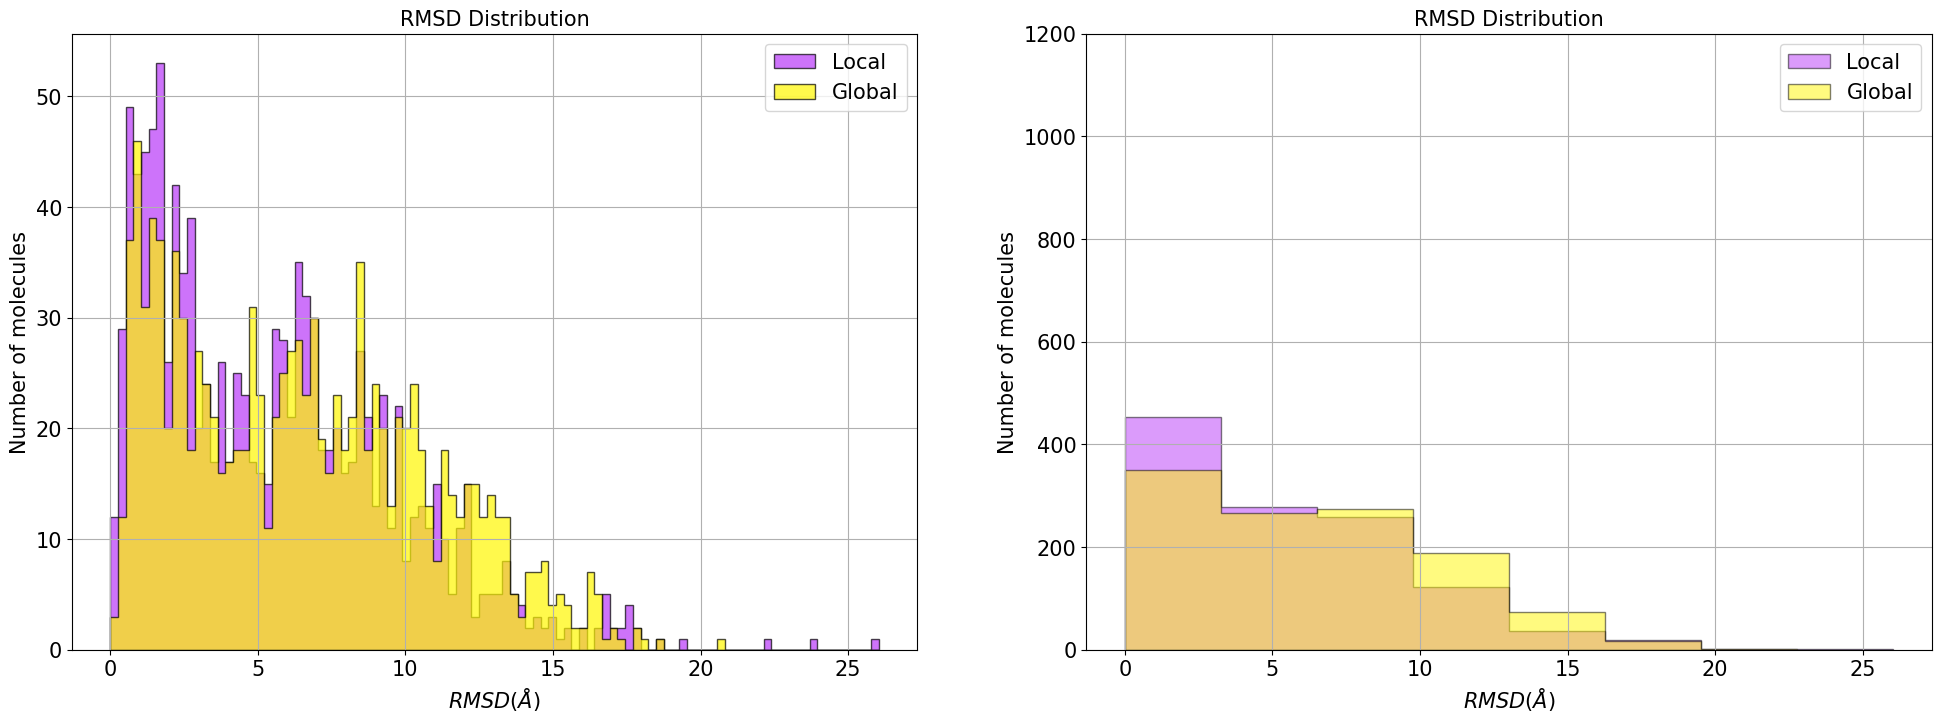

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

data_folder = '/content/drive/MyDrive/pyLiBELa/data'
%cd ~
%cd $data_folder

rmsd_filename_mma = 'rmsd_sb2021_mma_dockrmsd.out'
rmsd_filename_stogo = 'rmsd_sb2021_stogo_dockrmsd.out'

df = pd.read_csv(rmsd_filename_mma,sep='\t',header=None,names=['PDB','Local'])
df['Global']= pd.read_csv(rmsd_filename_stogo, usecols = [1], sep='\t',header=None)


#df

fig= plt.figure(figsize=(24,8))
plt.style.use('default')

ax1 = fig.add_subplot(1,2,1)

n_bins = 100
df.plot(kind='hist',
        alpha=0.7,
        bins=n_bins,
        title='RMSD Distribution',
        grid=True,
        ax = ax1,
        fontsize=15,
        histtype='stepfilled',
        color = ['#b838f8', '#fff700'],
        edgecolor='k')

ax1.set_title('RMSD Distribution',fontsize=15)
ax1.set_xlabel(r'$RMSD (\AA)$',fontsize=15)
ax1.set_ylabel('Number of molecules',fontsize=15)
ax1.legend(fontsize=15)

ax2 = fig.add_subplot(1,2,2)

df.plot(kind='hist',
        bins=8,
        alpha = 0.5,
        grid=True,
        ax = ax2,
        fontsize=15,
        histtype='stepfilled',
        color = ['#b838f8', '#fff700'],
        edgecolor='k')

ax2.legend(fontsize=15)
ax2.set_ylim(0,1200)
ax2.set_title('RMSD Distribution',fontsize=15)
ax2.set_xlabel(r'$RMSD (\AA)$',fontsize=15)
ax2.set_ylabel('Number of molecules',fontsize=15)


#ax2.plot([0,8.68],[0.7824*1172,0.7824*1172],'k--')

In [ ]:
for optimization in ['Local','Global']:
  total = len(df[optimization])
#  print('Total',total)
  #print(df[optimization].max())
  print(optimization)
  print('')

  for val in [3,2,1]:
    sub_val = df[optimization] < val
    sub_val = sub_val.sum()
    print('%.2f%% abaixo de %.1f Angstrom.'%(100*sub_val/total,val))
    print('')





Local

36.86% abaixo de 3.0 Angstrom.

25.34% abaixo de 2.0 Angstrom.

10.84% abaixo de 1.0 Angstrom.

Global

27.56% abaixo de 3.0 Angstrom.

18.77% abaixo de 2.0 Angstrom.

7.94% abaixo de 1.0 Angstrom.



In [ ]:
rmsd_obrmsd_file = open(data_folder+'/rmsd_sb2021_local_obrmsd.out','r')
rmsd_obrmsd_lines = rmsd_obrmsd_file.readlines()

rmsd_obrmsd = np.zeros(len(rmsd_obrmsd_lines)-4)
#rmsd_obrmsd = list(rmsd_obrmsd)

i=0
for rmsd in rmsd_obrmsd_lines:
  if rmsd[0] != '#':
    rmsd = rmsd.split()[1]
    #print(rmsd.split()[1])
    if rmsd == 'None':
      rmsd_obrmsd[i] = 21
    elif rmsd == 'inf':
      rmsd_obrmsd[i] = 28
    elif rmsd[0] == '=':
      rmsd_obrmsd[i] = -1
    else:
      rmsd_obrmsd[i] = float(rmsd)

    i+=1



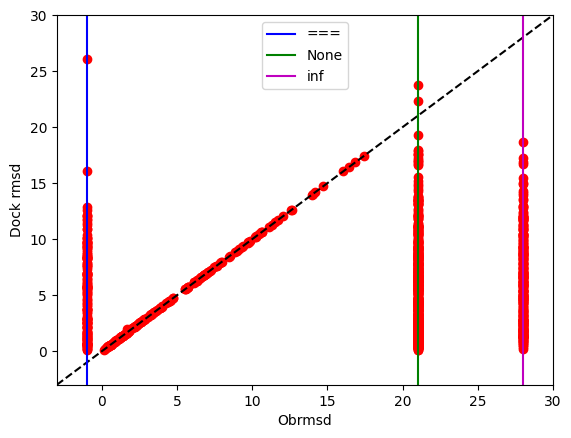

In [ ]:
plt.plot(rmsd_obrmsd,df['Local rmsd'], 'ro')
plt.plot([-3,40],[-3,40],'k--')

plt.ylabel('Dock rmsd')
plt.xlabel('Obrmsd')

plt.ylim(-3,30)
plt.xlim(-3,30)

plt.plot([-1,-1],[-3,30],'b',label='===')
plt.plot([21,21],[-3,30],'g',label='None')
plt.plot([28,28],[-3,30],'m',label='inf')

plt.legend(loc=9)